In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import pyfpgrowth as fp

import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time

In [2]:
# Reading JSON data into python as pandas dataframe.

data = pd.read_json('/Users/abdulrehman/Desktop/usml/data/AMAZON_FASHION.json',lines=True)
meta_data = pd.read_json('/Users/abdulrehman/Desktop/usml/data/meta_AMAZON_FASHION.json',lines=True)

# print(data)
# print(meta_data)

In [3]:
# Converting unix time to Date format and storing it in reviewTime Column.

data['reviewTime']=data.apply(lambda row: list(time.gmtime(row.unixReviewTime))[:-6], axis=1)
data = data.sort_values('unixReviewTime')
data['year']=data.apply(lambda row: row.reviewTime[0], axis=1)
# print(data)

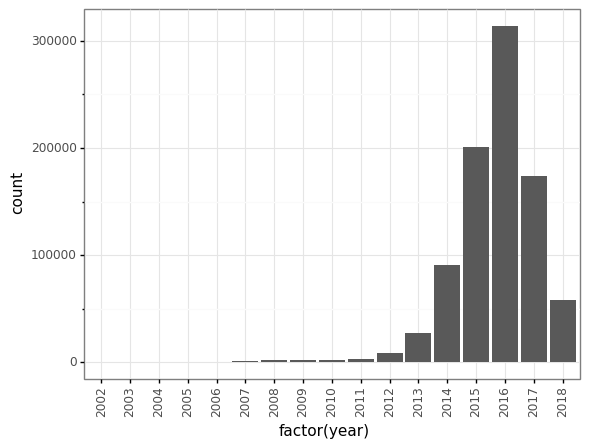

<ggplot: (7729826825)>

In [4]:
# As we can see the data is recorded from 11 nov 2002 - 1 oct 2018.
# We can plot year-wise count of reviews. 
(p9.ggplot(data=data,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

In [5]:
# We can see that there is a rise in reviews from 2002 to 2016 then there is a decrease in reviews. 
# The 2018 data does not consider Oct, Nov and December,
# which have major shopping periods such as thanksgiving and christmas.
# There is still a decrease in reviews after 2016 this could be due to new competitors.

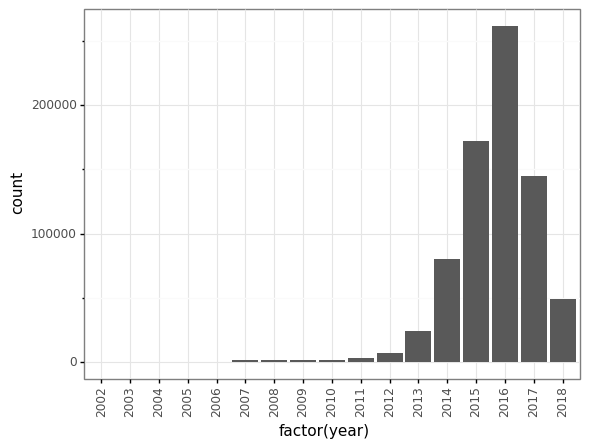

<ggplot: (7725031805)>

In [6]:
#Now to plot the number of Unique reviewers we have to keep the value when the reviewer first reviewed a product and delete the rest.
data_unique_reviewers = data.drop_duplicates('reviewerID',keep='first')
# print(data_unique_reviewers)

(p9.ggplot(data=data_unique_reviewers,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

In [7]:
del data_unique_reviewers
# We can see that there is a rise in the number of unique reviewers from 2002 to 2016
# then there is a decrease in the number of unique reviewers. 

In [8]:
# Now we have to Find the most frequently purchased product of all time.
# Let us first count how many times Each Product was reviewed.

product_review_count = data.asin.value_counts()[:10].rename_axis('asin').reset_index(name='counts')
product_review_count['Title']=product_review_count.apply(lambda row: meta_data.loc[meta_data['asin'] == row.asin, 'title'].iloc[0] , axis=1)

print(product_review_count)

         asin  counts                                              Title
0  B000V0IBDM    4384           Powerstep Pinnacle Orthotic Shoe Insoles
1  B000KPIHQ4    4375           Powerstep Pinnacle Orthotic Shoe Insoles
2  B00I0VHS10    3889  90 Degree By Reflex Power Flex Yoga Capri – Ca...
3  B00RLSCLJM    3638  MJ Metals Jewelry 2mm to 10mm White Tungsten C...
4  B000PHANNM    2572  i play. Baby Boys Flap Sun Protection Hat, Aqu...
5  B000YFSR5G    2538               Hanes Mens EcoSmart Fleece Sweatpant
6  B00201ER88    2206  var aPageStart = (new Date()).getTime();\nvar ...
7  B00GXE331K    2027  Best RFID Blocking Card Holder Case for Men an...
8  B000P0X15G    1928  i play. Girls' Baby Brim Sun Protection Hat, A...
9  B00XT15P8E    1855  Marino Avenue Men’s Genuine Leather Ratchet Dr...


In [9]:
# The above are the top 10 Reviewed products.